In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import os
import sys
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

age_conv={'1':'0∼12세','2':'13∼18세','3':'19∼24세','4':'25∼29세','5':'30∼34세',
          '6':'35∼39세','7':'40∼44세','8':'45∼49세','9':'50∼54세','10':'55∼59세','11':'60세 이상'}

def getresult(startDate,endDate,timeUnit,keywordGroups,device,gender,ages):

    url = "https://openapi.naver.com/v1/datalab/search";
    
    response_results_all = pd.DataFrame()
    
    for age in ages:
        body_dict={} #검색 정보를 저장할 변수
        body_dict['startDate']=startDate
        body_dict['endDate']=endDate
        body_dict['timeUnit']=timeUnit
        body_dict['keywordGroups']=keywordGroups
        body_dict['device']=device
        body_dict['gender']=gender
        body_dict['ages']=[age]

        body=str(body_dict).replace("'",'"') # ' 문자로는 에러가 발생해서 " 로 변환

        request = urllib.request.Request(url)
        request.add_header("X-Naver-Client-Id",client_id)
        request.add_header("X-Naver-Client-Secret",client_secret)
        request.add_header("Content-Type","application/json")
        response = urllib.request.urlopen(request, data=body.encode("utf-8"))
        rescode = response.getcode()
        if(rescode==200):
            response_body = response.read()
            response_json = json.loads(response_body)
        else:
            print("Error Code:" + rescode)

        # 결과데이터중 'data' 와 'title'만 따로 DataFrame으로 저장
        response_results = pd.DataFrame()
        for data in response_json['results']:
            result=pd.DataFrame(data['data'])
            result['title']=data['title']
            result['age']=age # 연령대 정보를 추가

            response_results = pd.concat([response_results,result])
        
        response_results_all = pd.concat([response_results_all,response_results])
        
    #title별로 그래프를 그리기 위한부분
    titles=response_results['title'].unique() 

    for age in ages:
        plt.figure(figsize=(8,4))
        for title in titles:
            data=response_results_all.loc[(response_results_all['title']==title) 
                          & (response_results_all['age']==age),:]
            plt.plot(data['period'],data['ratio'],label=title)
            plt.xticks(rotation=90)
            plt.legend(loc='lower left')
        plt.title(str(age_conv[age]))
        plt.show()

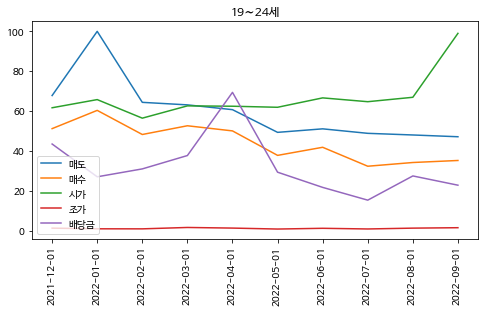

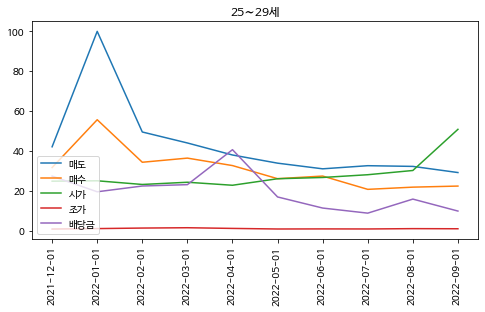

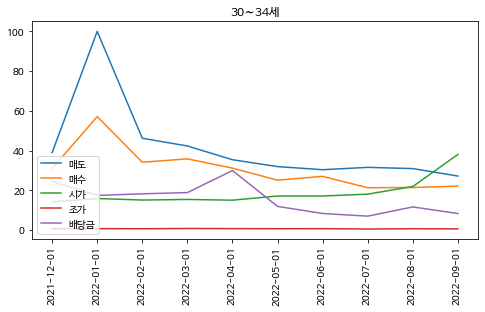

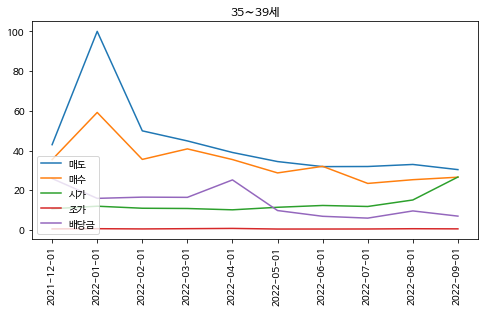

In [ ]:
client_id = "RbeFcuX1_bRj6myJlPI2"
client_secret = "nwEOscHPSq"

startDate='2021-12-01'
endDate='2022-09-30'
timeUnit='month'  #'day','week','month'
keywordGroups=[
    {"groupName":"매도",  "keywords":["매도"]},
    {"groupName":"매수",  "keywords":["매수"]},
    {"groupName":"시가",  "keywords":["시가"]},
    {"groupName":"조가",  "keywords":["조가"]},
    {"groupName":"배당금",  "keywords":["배당금"]}
]
device=''  #'pc','mo'
gender=''   #'m','f'
ages=['3','4','5','6']  # #1: 0∼12세, 2: 13∼18세, 3: 19∼24세, 4: 25∼29세, 
#5: 30∼34세, 6: 35∼39세, 7: 40∼44세, 8: 45∼49세, 9: 50∼54세, 10: 55∼59세, 11: 60세 이상


getresult(startDate,endDate,timeUnit,keywordGroups,device,gender,ages)

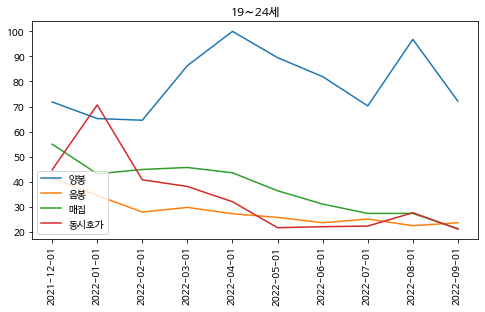

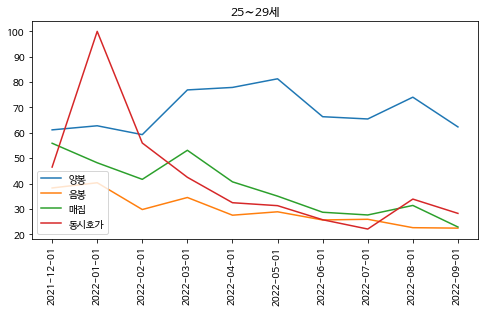

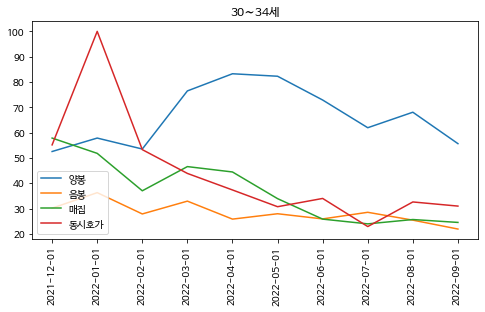

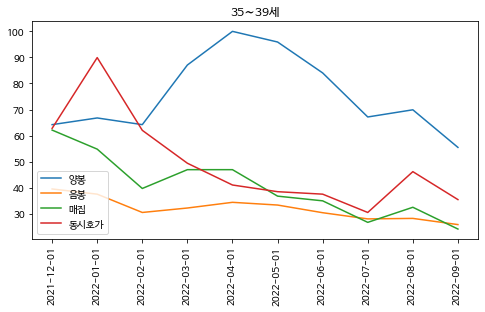

In [ ]:
startDate='2021-12-01'
endDate='2022-09-30'
timeUnit='month'  #'day','week','month'
keywordGroups=[
    {"groupName":"양봉",  "keywords":["양봉"]},
    {"groupName":"음봉",  "keywords":["음봉"]},
    {"groupName":"매집",  "keywords":["매집"]},
    {"groupName":"동시호가",  "keywords":["동시호가"]}
]
device=''  #'pc','mo'
gender=''   #'m','f'
ages=['3','4','5','6']  # #1: 0∼12세, 2: 13∼18세, 3: 19∼24세, 4: 25∼29세, 
#5: 30∼34세, 6: 35∼39세, 7: 40∼44세, 8: 45∼49세, 9: 50∼54세, 10: 55∼59세, 11: 60세 이상


getresult(startDate,endDate,timeUnit,keywordGroups,device,gender,ages)

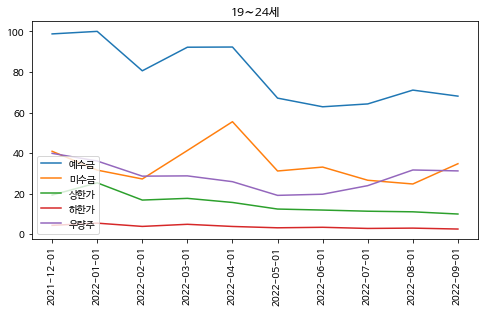

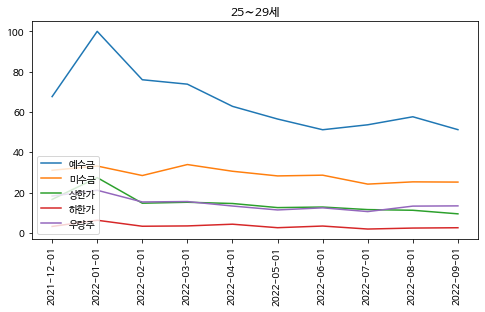

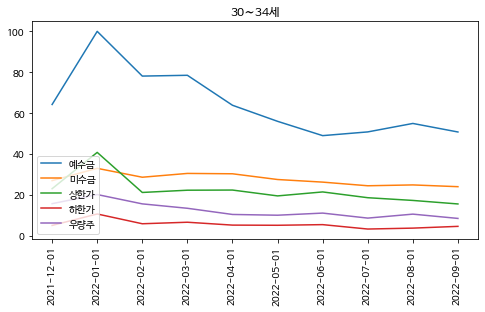

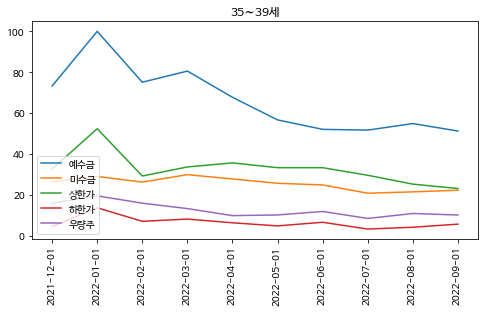

In [ ]:
startDate='2021-12-01'
endDate='2022-09-30'
timeUnit='month'  #'day','week','month'
keywordGroups=[
    {"groupName":"예수금",  "keywords":["예수금"]},
    {"groupName":"미수금",  "keywords":["미수금"]},
    {"groupName":"상한가",  "keywords":["상한가"]},
    {"groupName":"하한가",  "keywords":["하한가"]},
    {"groupName":"우량주",  "keywords":["우량주"]}
]
device=''  #'pc','mo'
gender=''   #'m','f'
ages=['3','4','5','6']  # #1: 0∼12세, 2: 13∼18세, 3: 19∼24세, 4: 25∼29세, 
#5: 30∼34세, 6: 35∼39세, 7: 40∼44세, 8: 45∼49세, 9: 50∼54세, 10: 55∼59세, 11: 60세 이상


getresult(startDate,endDate,timeUnit,keywordGroups,device,gender,ages)

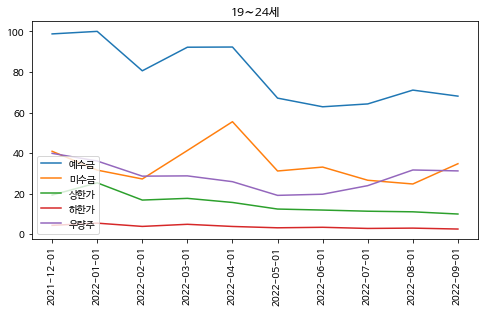

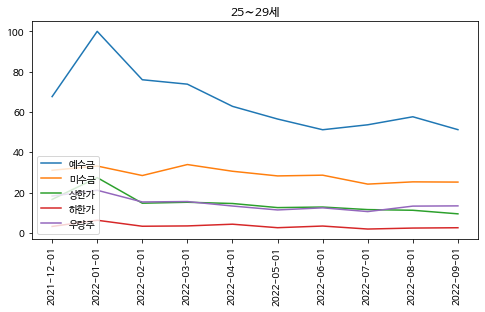

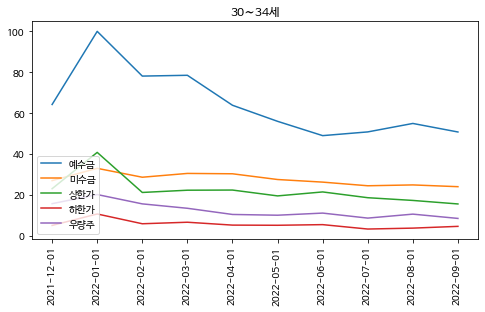

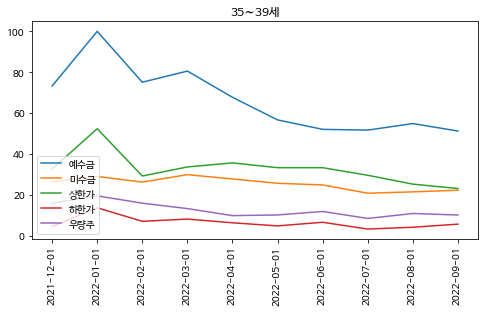

In [ ]:
startDate='2021-12-01'
endDate='2022-09-30'
timeUnit='month'  #'day','week','month'
keywordGroups=[
    {"groupName":"예수금",  "keywords":["예수금"]},
    {"groupName":"미수금",  "keywords":["미수금"]},
    {"groupName":"상한가",  "keywords":["상한가"]},
    {"groupName":"하한가",  "keywords":["하한가"]},
    {"groupName":"우량주",  "keywords":["우량주"]}
]
device=''  #'pc','mo'
gender=''   #'m','f'
ages=['3','4','5','6']  # #1: 0∼12세, 2: 13∼18세, 3: 19∼24세, 4: 25∼29세, 
#5: 30∼34세, 6: 35∼39세, 7: 40∼44세, 8: 45∼49세, 9: 50∼54세, 10: 55∼59세, 11: 60세 이상


getresult(startDate,endDate,timeUnit,keywordGroups,device,gender,ages)

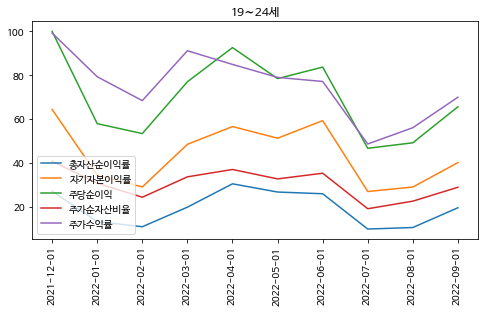

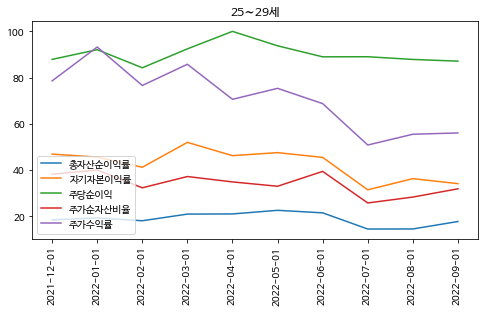

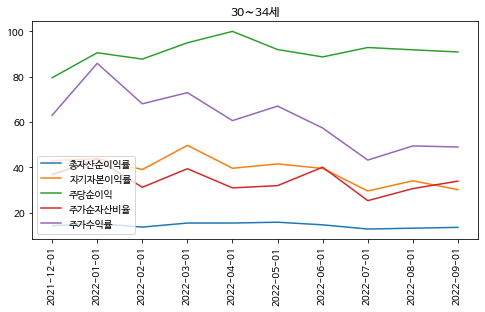

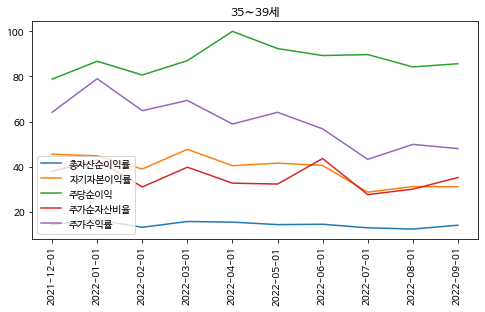

In [ ]:
startDate='2021-12-01'
endDate='2022-09-30'
timeUnit='month'  #'day','week','month'
keywordGroups=[
    {"groupName":"총자산순이익률",  "keywords":["총자산순이익률","ROA"]},
    {"groupName":"자기자본이익률",  "keywords":["자기자본이익률","ROE"]},
    {"groupName":"주당순이익",  "keywords":["주당순이익","EPS"]},
    {"groupName":"주가순자산비율",  "keywords":["주가순자산비율","PBR","주가 순자산 비율"]},
    {"groupName":"주가수익률",  "keywords":["주가수익률", "PER"]}
]
device=''  #'pc','mo'
gender=''   #'m','f'
ages=['3','4','5','6']  # #1: 0∼12세, 2: 13∼18세, 3: 19∼24세, 4: 25∼29세, 
#5: 30∼34세, 6: 35∼39세, 7: 40∼44세, 8: 45∼49세, 9: 50∼54세, 10: 55∼59세, 11: 60세 이상


getresult(startDate,endDate,timeUnit,keywordGroups,device,gender,ages)

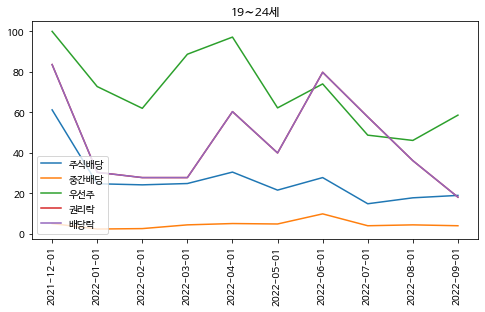

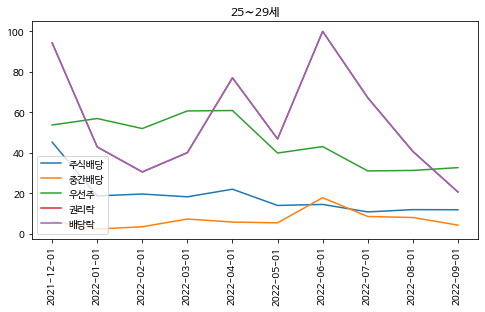

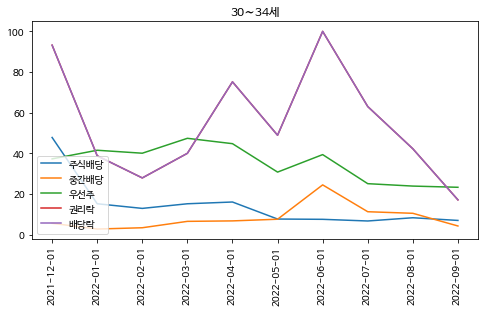

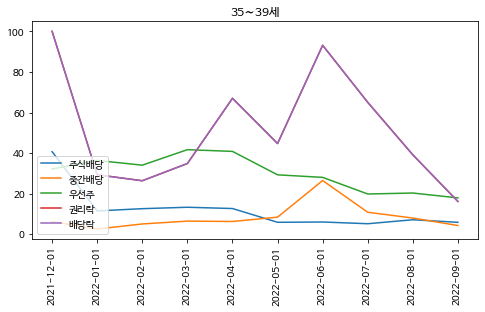

In [ ]:
startDate='2021-12-01'
endDate='2022-09-30'
timeUnit='month'  #'day','week','month'
keywordGroups=[
    {"groupName":"주식배당",  "keywords":["주식배당"]},
    {"groupName":"중간배당",  "keywords":["중간배당"]},
    {"groupName":"우선주",  "keywords":["우선주"]},
    {"groupName":"권리락",  "keywords":["권리락"]},
    {"groupName":"배당락",  "keywords":["권리락"]}
]
device=''  #'pc','mo'
gender=''   #'m','f'
ages=['3','4','5','6']  # #1: 0∼12세, 2: 13∼18세, 3: 19∼24세, 4: 25∼29세, 
#5: 30∼34세, 6: 35∼39세, 7: 40∼44세, 8: 45∼49세, 9: 50∼54세, 10: 55∼59세, 11: 60세 이상


getresult(startDate,endDate,timeUnit,keywordGroups,device,gender,ages)

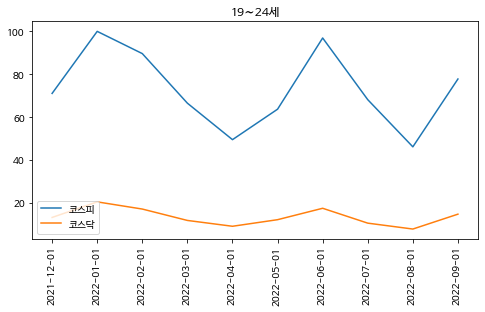

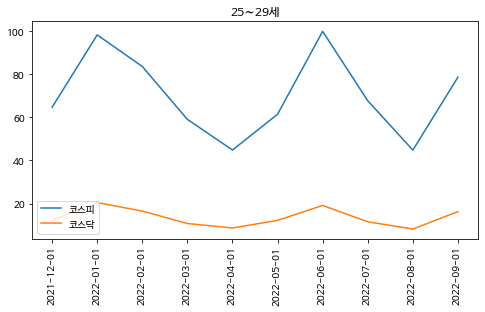

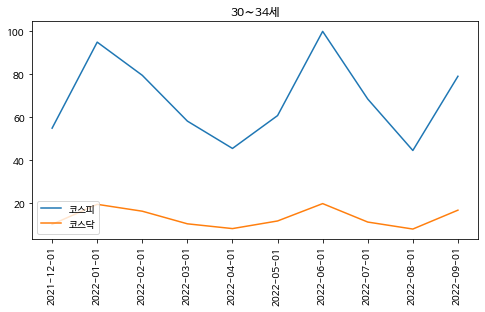

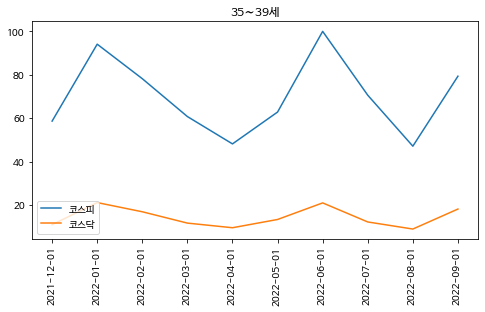

In [ ]:
startDate='2021-12-01'
endDate='2022-09-30'
timeUnit='month'  #'day','week','month'
keywordGroups=[
    {"groupName":"코스피",  "keywords":["코스피","KOSPI"]},
    {"groupName":"코스닥",  "keywords":["코스닥", "KOSDAQ"]},
]
device=''  #'pc','mo'
gender=''   #'m','f'
ages=['3','4','5','6']  # #1: 0∼12세, 2: 13∼18세, 3: 19∼24세, 4: 25∼29세, 
#5: 30∼34세, 6: 35∼39세, 7: 40∼44세, 8: 45∼49세, 9: 50∼54세, 10: 55∼59세, 11: 60세 이상


getresult(startDate,endDate,timeUnit,keywordGroups,device,gender,ages)

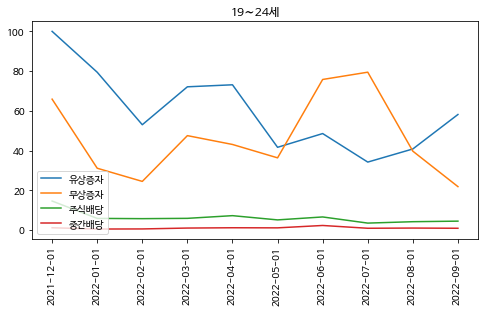

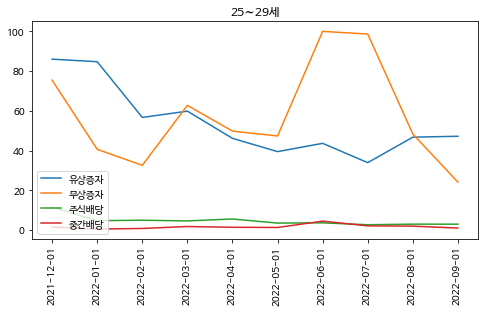

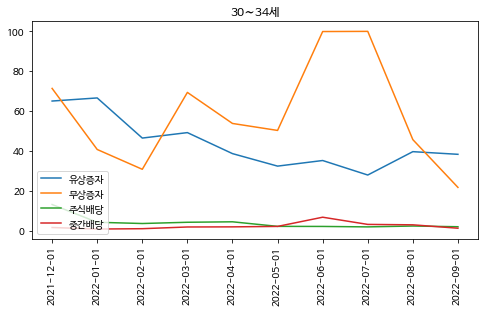

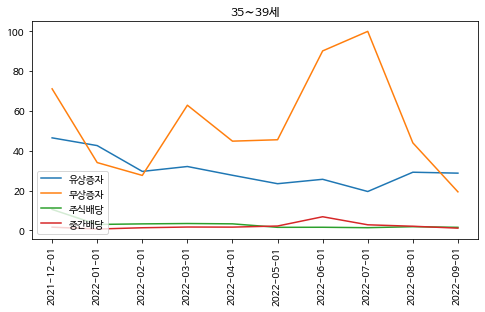

In [ ]:
startDate='2021-12-01'
endDate='2022-09-30'
timeUnit='month'  #'day','week','month'
keywordGroups=[
    {"groupName":"유상증자",  "keywords":["유상증자"]},
    {"groupName":"무상증자",  "keywords":["무상증자"]},
    {"groupName":"주식배당",  "keywords":["주식배당"]},
    {"groupName":"중간배당",  "keywords":["중간배당"]},
]
device=''  #'pc','mo'
gender=''   #'m','f'
ages=['3','4','5','6']  # #1: 0∼12세, 2: 13∼18세, 3: 19∼24세, 4: 25∼29세, 
#5: 30∼34세, 6: 35∼39세, 7: 40∼44세, 8: 45∼49세, 9: 50∼54세, 10: 55∼59세, 11: 60세 이상


getresult(startDate,endDate,timeUnit,keywordGroups,device,gender,ages)